In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read dataset for training
raw_data_train = pd.read_csv('~/nba-dl/data/matches/RS/book-RS.csv')
raw_data_train.columns

Index(['SEASON_ID', 'HOME_TEAM_NAME', 'AWAY_TEAM_NAME', 'GAME_ID', 'GAME_DATE',
       'HWIN', 'HPLUSMINUS', 'HFGM', 'HFGA', 'HFG_PCT', 'HFG3M', 'HFG3A',
       'HFG3_PCT', 'HFTM', 'HFTA', 'HFT_PCT', 'HOREB', 'HDREB', 'HREB', 'HAST',
       'HSTL', 'HBLK', 'HTOV', 'HPF', 'AFGM', 'AFGA', 'AFG_PCT', 'AFG3M',
       'AFG3A', 'AFG3_PCT', 'AFTM', 'AFTA', 'AFT_PCT', 'AOREB', 'ADREB',
       'AREB', 'AAST', 'ASTL', 'ABLK', 'ATOV', 'APF'],
      dtype='object')

In [3]:
raw_data_train.shape

(24154, 41)

In [4]:
'''
GLOSSARY:

HWIN     - home team win, W means win, L means loss, later W is mapped to 1, L to 0 - LABEL
HFGM     - home team field goal made
HFGA     - home team field goal attempts
HFG_PCT  - home team percentage field goal
HFG3M    - home team 3PT field goal made
HFG3A    - home team 3PT field goal attempts
HFG3_PCT - home team percentage 3PT field goal
HFTM     - home team free throws made
HFTA     - home team free throws attempts
HFT_PCT  - home team percentage free throws
HOREB    - home team offensive rebounds
HDREB    - home team defensive rebounds
HAST     - home team assists
HSTL     - home team steals
HBLK     - home team blocks
HTOV     - home team turnovers
HPF      - home team personal fouls
AFGM     - away team field goal made
AFGA     - away team field goal attempts
AFG_PCT  - away team percentage field goal
AFG3M    - away team 3PT field goal made
AFG3A    - away team 3PT field goal attempts
AFG3_PCT - away team percentage 3PT field goal
AFTM     - away team free throws made
AFTA     - away team free throws attempts
AFT_PCT  - away team percentage free throws
AOREB    - away team offensive rebounds
ADREB    - away team defensive rebounds
AAST     - away team assists
ASTL     - away team steals
ABLK     - away team blocks
ATOV     - away team turnovers
APF      - away team personal fouls
'''

# selecting numerical features

columns = ['HWIN',
           'HFGM', 'HFGA', 'HFG_PCT', 'HFG3M', 'HFG3A', 'HFG3_PCT', 'HFTM', 'HFTA', 'HFT_PCT',
           'HOREB', 'HDREB', 'HREB', 'HAST', 'HSTL', 'HBLK', 'HTOV', 'HPF',
           'AFGM', 'AFGA', 'AFG_PCT', 'AFG3M', 'AFG3A', 'AFG3_PCT', 'AFTM', 'AFTA', 'AFT_PCT',
           'AOREB', 'ADREB', 'AREB', 'AAST', 'ASTL', 'ABLK', 'ATOV', 'APF']

In [5]:
# making new dataset with selected columns
data_train = raw_data_train[columns]
data_train.head()

,HWIN,HFGM,HFGA,HFG_PCT,HFG3M,HFG3A,HFG3_PCT,HFTM,HFTA,HFT_PCT,...,AFTA,AFT_PCT,AOREB,ADREB,AREB,AAST,ASTL,ABLK,ATOV,APF
0,W,39,79,0.494,4,12,0.333,28,30,0.933,...,21,0.762,14,31,45,26,7,5,15,30
1,W,30,78,0.385,7,19,0.368,23,32,0.719,...,8,0.750,21,39,60,17,5,3,15,24
2,L,40,89,0.449,5,11,0.455,23,29,0.793,...,22,0.727,10,37,47,32,10,3,17,30
3,W,47,79,0.595,4,8,0.500,10,20,0.500,...,28,0.679,10,18,28,20,9,4,16,25
4,L,38,92,0.413,4,15,0.267,20,25,0.800,...,35,0.771,12,26,38,26,6,3,17,20


In [6]:
# new dataset shape
data_train.shape

(24154, 35)

In [7]:
# describe dataset
data_train.describe()

,HFGM,HFGA,HFG_PCT,HFG3M,HFG3A,HFG3_PCT,HFTM,HFTA,HFT_PCT,HOREB,...,AFTA,AFT_PCT,AOREB,ADREB,AREB,AAST,ASTL,ABLK,ATOV,APF
count,24154.000000,24154.000000,24154.000000,24154.000000,24154.000000,24154.000000,24154.000000,24154.000000,24154.000000,24154.000000,...,24154.000000,24154.000000,24154.000000,24154.000000,24154.000000,24154.000000,24154.000000,24154.000000,24154.000000,24154.000000
mean,37.734702,82.282231,0.459618,6.989526,19.418233,0.356756,18.649996,24.611700,0.758554,11.366440,...,23.607394,0.756082,11.029271,30.726588,41.755858,21.107725,7.560901,4.620850,14.047942,21.474331
std,5.295061,7.728873,0.056808,3.638958,7.900855,0.120779,6.338755,7.850081,0.099730,4.047894,...,7.553324,0.102972,3.959669,5.344786,6.456121,5.013086,2.897159,2.459221,3.940520,4.595665
min,19.000000,54.000000,0.247000,0.000000,1.000000,0.000000,1.000000,1.000000,0.143000,1.000000,...,1.000000,0.143000,0.000000,12.000000,20.000000,4.000000,0.000000,0.000000,3.000000,5.000000
25%,34.000000,77.000000,0.420000,4.000000,14.000000,0.278000,14.000000,19.000000,0.696000,9.000000,...,18.000000,0.692000,8.000000,27.000000,37.000000,18.000000,6.000000,3.000000,11.000000,18.000000
50%,38.000000,82.000000,0.458000,7.000000,18.000000,0.357000,18.000000,24.000000,0.765000,11.000000,...,23.000000,0.762000,11.000000,31.000000,42.000000,21.000000,7.000000,4.000000,14.000000,21.000000
75%,41.000000,87.000000,0.500000,9.000000,24.000000,0.433000,23.000000,30.000000,0.826000,14.000000,...,28.000000,0.828000,14.000000,34.000000,46.000000,24.000000,9.000000,6.000000,17.000000,24.000000
max,62.000000,125.000000,0.684000,27.000000,70.000000,1.000000,48.000000,64.000000,1.000000,33.000000,...,64.000000,1.000000,38.000000,56.000000,81.000000,46.000000,20.000000,18.000000,32.000000,42.000000


In [8]:
# map labels to numeric values

data_train['HWIN'] = data_train['HWIN'].map({'W': 1, 'L': 0})
data_train.head()

/home/jmacek/nba-dl/inz/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,HWIN,HFGM,HFGA,HFG_PCT,HFG3M,HFG3A,HFG3_PCT,HFTM,HFTA,HFT_PCT,...,AFTA,AFT_PCT,AOREB,ADREB,AREB,AAST,ASTL,ABLK,ATOV,APF
0,1,39,79,0.494,4,12,0.333,28,30,0.933,...,21,0.762,14,31,45,26,7,5,15,30
1,1,30,78,0.385,7,19,0.368,23,32,0.719,...,8,0.750,21,39,60,17,5,3,15,24
2,0,40,89,0.449,5,11,0.455,23,29,0.793,...,22,0.727,10,37,47,32,10,3,17,30
3,1,47,79,0.595,4,8,0.500,10,20,0.500,...,28,0.679,10,18,28,20,9,4,16,25
4,0,38,92,0.413,4,15,0.267,20,25,0.800,...,35,0.771,12,26,38,26,6,3,17,20


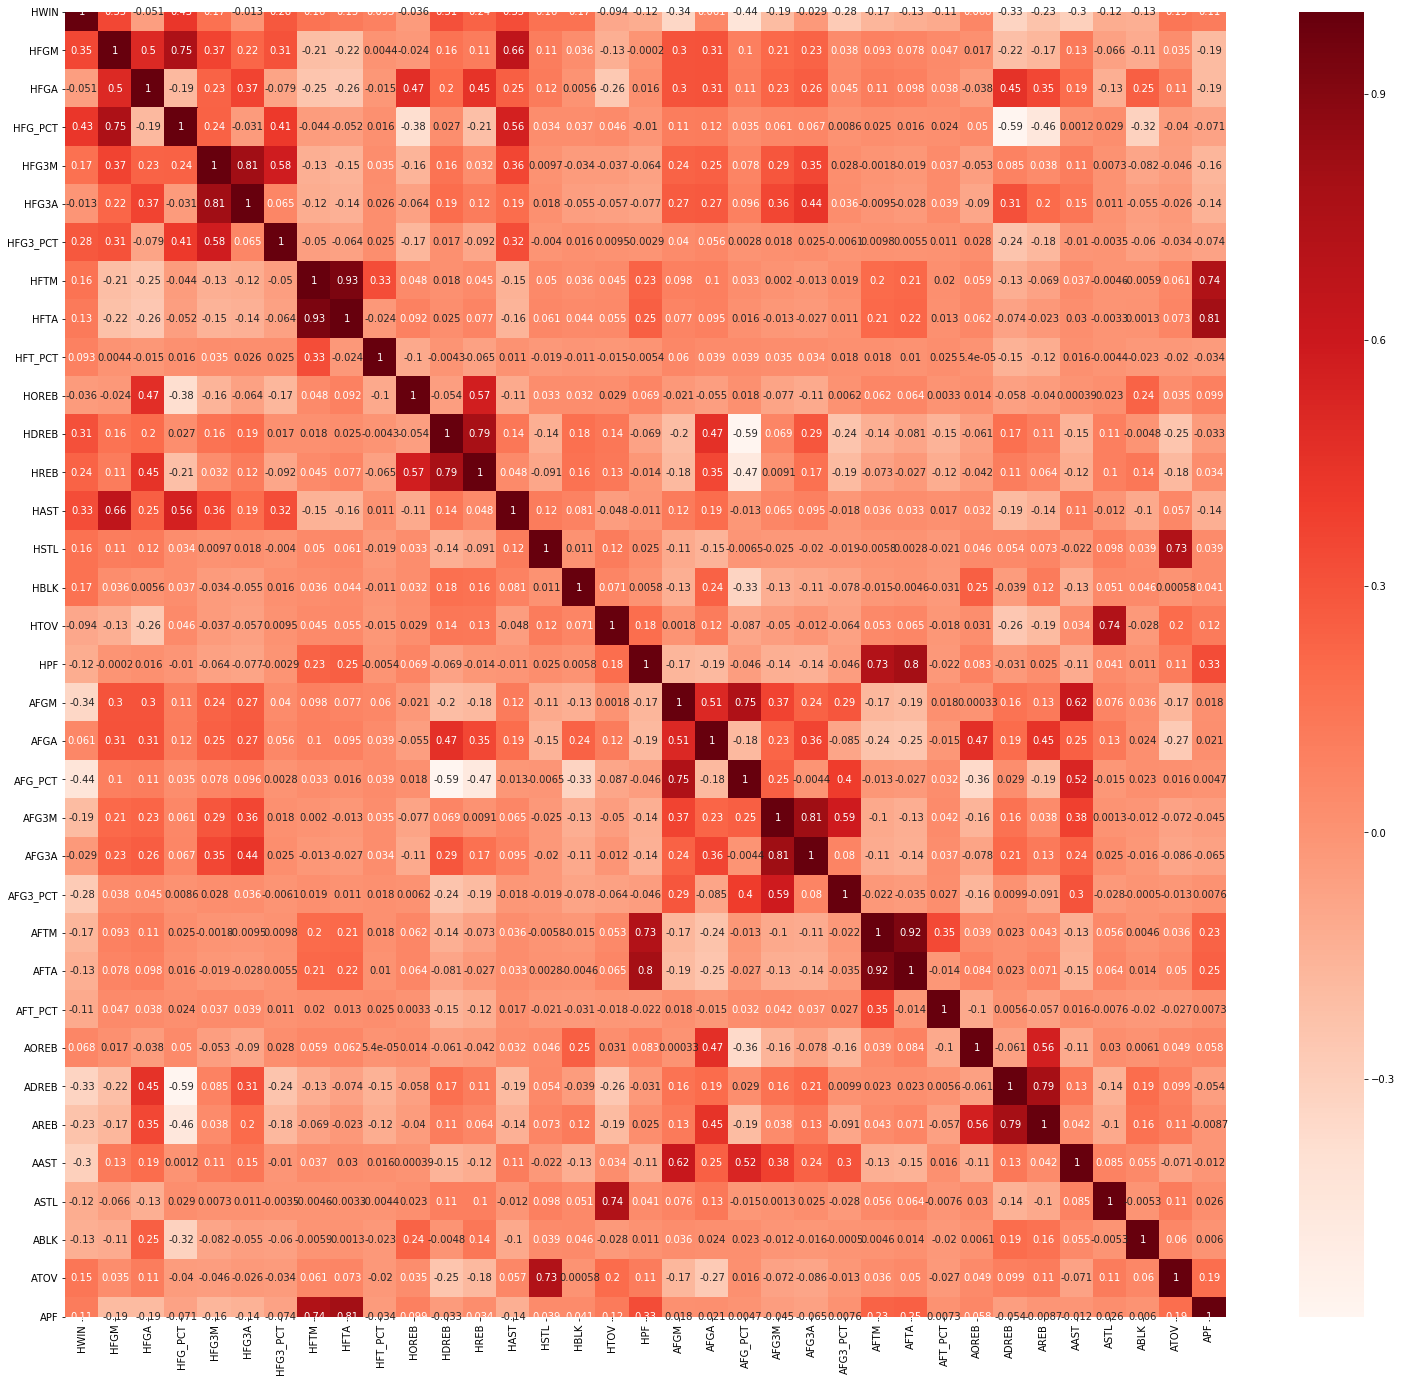

Relevant features from Pearson correlation:


In [9]:
'''
Pearson Correlation:

The Pearson correlation coefficient can take a range of values from +1 to -1.
A value of 0 indicates that there is no association between the two variables. 
A value greater than 0 indicates a positive association.
A value less than 0 indicates a negative association.
'''

plt.figure(figsize=(26,24))
cor = data_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
cor_target = abs(cor['HWIN'])
relevant_pearson = cor_target[cor_target>0.2]
print("Relevant features from Pearson correlation:")
relevant_pearson = list(relevant_pearson.keys()[1:])

In [10]:
# separate data to features(X) and labels(y)
X_train = data_train.drop("HWIN", 1)
y_train = data_train["HWIN"]

In [11]:
"""
Statistical tests

We can use statistical tests to determine which features have the strongest relationship with the label.
SelectKBest class from scikit-learn provides set of tests and we're gonna use chi^2 statistical test.
Features with the highest scores have the best relationship with output variable.
"""

from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

test = SelectKBest(score_func=chi2)
fit = test.fit(X_train, y_train)
set_printoptions(precision=5)
for i in range(len(columns[1:])):
    print(str(columns[i+1]) + " : " + str(fit.scores_[i]))

HFGM : 2171.604663718264
HFGA : 44.91503857399014
HFG_PCT : 31.907432677973404
HFG3M : 1295.8516520984574
HFG3A : 12.192914958158507
HFG3_PCT : 78.94066423410945
HFTM : 1274.0746214463275
HFTA : 1025.946226275447
HFT_PCT : 2.726339355024983
HOREB : 45.98565782159488
HDREB : 2192.675782105841
HREB : 1347.2412621442181
HAST : 3033.231097915293
HSTL : 744.1657501179876
HBLK : 921.9300500672003
HTOV : 227.7487979707359
HPF : 352.59852811514486
AFGM : 2025.6847624750244
AFGA : 65.87951187461633
AFG_PCT : 31.41969795487816
AFG3M : 1737.324253058538
AFG3A : 66.92063999945029
AFG3_PCT : 75.41235879282533
AFTM : 1411.0471069574987
AFTA : 1054.7850759662056
AFT_PCT : 3.7975943846028244
AOREB : 156.89226970824345
ADREB : 2428.994042741848
AREB : 1284.524142944271
AAST : 2572.379707190321
ASTL : 394.92533685078206
ABLK : 546.1126177168707
ATOV : 578.5004438766408
APF : 302.0538964803482


In [12]:
# 12 features with biggest value
relevant_statistical = ['HAST', 'AAST', 'ADREB', 'HDREB', 'HFGM', 'AFGM',
                       'AFG3M', 'AFTM', 'HREB', 'HFG3M', 'AFTA', 'HFTA']

In [13]:
'''
Recursive Feature Elimination

This model recursively removes features to identify which of them have the biggest impact on output attribute.
Presented example uses RFE with logistic regression to identify top 12 features.
'''
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, 12)
fit = rfe.fit(X_train, y_train)

/home/jmacek/nba-dl/inz/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jmacek/nba-dl/inz/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jmacek/nba-dl/inz/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jmacek/nba-dl/inz/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jmacek/nba-dl/inz/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

In [14]:
for i in range(len(columns[1:])):
    print(str(columns[i+1]) + " : " + str(fit.support_[i]))

HFGM : True
HFGA : False
HFG_PCT : True
HFG3M : True
HFG3A : False
HFG3_PCT : True
HFTM : True
HFTA : False
HFT_PCT : True
HOREB : False
HDREB : False
HREB : False
HAST : False
HSTL : False
HBLK : False
HTOV : False
HPF : False
AFGM : True
AFGA : False
AFG_PCT : True
AFG3M : True
AFG3A : False
AFG3_PCT : True
AFTM : True
AFTA : False
AFT_PCT : False
AOREB : False
ADREB : False
AREB : False
AAST : False
ASTL : True
ABLK : False
ATOV : False
APF : False


In [15]:
# 12 features with True attribute
relevant_RFE = ['HFGM', 'HFG_PCT', 'HFG3M', 'HFG3_PCT', 'HFTM', 'HFT_PCT',
                'AFGM', 'AFG_PCT', 'AFG3M', 'AFG3_PCT', 'AFTM', 'ASTL']

In [16]:
'''
To identify importance of features, we can use decision trees, like in example below.
Attributes with the biggest value have the strongest relationship.
'''

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X_train, y_train)
for i in range(len(columns[1:])):
    print(str(columns[i+1]) + " : " + str(model.feature_importances_[i]))

/home/jmacek/nba-dl/inz/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


HFGM : 0.06712301977878753
HFGA : 0.01490142892214506
HFG_PCT : 0.08710218368584349
HFG3M : 0.024383864340732118
HFG3A : 0.014209628255211416
HFG3_PCT : 0.026934163407394043
HFTM : 0.03084029726665979
HFTA : 0.026780812780150213
HFT_PCT : 0.016201893943525503
HOREB : 0.014147918161067467
HDREB : 0.02652366273217289
HREB : 0.025980277640032537
HAST : 0.0422443606451683
HSTL : 0.0214996692319324
HBLK : 0.01643062976383949
HTOV : 0.01856812686821956
HPF : 0.02316111116715553
AFGM : 0.06346018856032919
AFGA : 0.015952430948876058
AFG_PCT : 0.10611416264666353
AFG3M : 0.02393940232052173
AFG3A : 0.014166781489814097
AFG3_PCT : 0.02869421931220432
AFTM : 0.030739864017146394
AFTA : 0.02463774939036432
AFT_PCT : 0.015580385402299387
AOREB : 0.013413929922317549
ADREB : 0.03791860758901152
AREB : 0.021686339243636568
AAST : 0.029269863493056495
ASTL : 0.019141827033654774
ABLK : 0.0146202607563443
ATOV : 0.023396073662185556
APF : 0.020234865621537004
